# Exercise Sheet 01: Data preprocessing, visualization, correlation, statistical testing, and modeling

**Introduction to Data Mining WS24/25**  
**Bielefeld University**  
**Alina Deriyeva, Adia Khalid, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2024-10-23**  
**Exercise Sheet Submission Deadline: Friday, 2024-11-01, noon (i.e. 12:00), via moodle**

**NOTE** The use of language models/AI tools is permitted under three conditions
1. transparency: you tell us that you used them
2. accountability: you take full responsibility for the submission, can explain and defend it
3. privacy: you do not transmit any private information to any external tool

We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool for research purposes.

## Probabilistic Modeling

Let's assume that a student does a test on a single topic in which they can achieve a certain number of points. Let's further assume that the probability that the student has understood the topic is denoted as $p \in [0, 1]$. Finally, let's assume that the number of points on the test Gaussian distributed with standard deviation $\sigma > 0$. However, the mean of the distribution depends on whether the student has understood the topic or not.

### Task 01.01

Formalize this scenario. In particular:
1. Model a random variable $Z$ that indicates whether the student understood the topic or not. What is the domain? What is the probability mass function $p_Z$? What are the parameters of this function?
2. Model a random variable $X$ for the number of points the student achieves on the test. What is the conditional probability density function $p_{X|Z}$? What are the parameters of this function?

#### Sub-task 1
$Z = (\mathcal{Z}, p_Z)$\
With $\mathcal{Z} = \{0,1\}$ (domain) and $p_Z: \mathcal{Z} -> \mathbb{R}$ (probability mass function)\
For notation, we will just write the parameters of the probability mass function implicitly: \
$p_Z(Z=0) = 1-p\quad$ and $\quad p_Z(Z=1) = p$\

<br/><br/>
#### Sub-task 2

$X = (\mathcal{X}, p_X)$\
With $\mathcal{X} = \{0, ..., N\}$, with $N$ being the maximum number of points in the test.\
Since the number of points a student achieves is Gaussian distributed with $\mu$ and $\sigma > 0$, we can write $p_X$ as \
$p_X(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)$\
\
We are now interested in the conditional probability density function of X in relation to Z. This just follows from Bayes' Theorem:\
$p_{X|Z}(x\,|\,z) = \dfrac{p_{Z|X}(z\,|\,x) \, p_X(x)}{p_Z(z)}$\
In this case, the parameter $x$ stands for the points achieved, and $z$ wheter or not the student has understood the topic.
Once again, we can use the slightly different notation used in Z to make it a bit clearer:\
$p_{X|Z}(X=x\,|\,Z=z) = \dfrac{p_{Z|X}(Z=z\,|\,X=x) \, p_X(X=x)}{p_Z(Z=z)}$\






### Task 01.02

Using Bayes' theorem and the law of total probability, compute the conditional probability mass $p_{Z|X}(1|x)$ for the student having understood the topic given their achieved number of points.

$p_{Z|X}(Z=1\,|\,X=x) = \dfrac{p_{X|Z}(X=x\,|\,Z=1) \, p_Z(Z=1)}{p_X(X=x)} = \dfrac{p_{X|Z}(X=x\,|\,Z=1) \, p}{p_X(X=x)} = \dfrac{p_{X|Z}(X=x\,|\,Z=1) \, p}{p_{X|Z}(X=x\,|\,Z=0) \cdot p_Z(Z=0) + p_{X|Z}(X=x\,|\,Z=1) \cdot p_Z(Z=1)}$\
$= \dfrac{p_{X|Z}(X=x\,|\,Z=1) \, p}{p_{X|Z}(X=x\,|\,Z=0) \cdot (1-p) + p_{X|Z}(X=x\,|\,Z=1) \cdot p}$
$= \dfrac{1}{\frac{p_{X|Z}(X=x\,|\,Z=0)}{p_{X|Z}(X=x\,|\,Z=1)} \cdot \frac{(1-p)}{p} + 1}$

<!-- We can continue to reduce this in size by assuming tgat  p_{X|Z}(X=x\,|\,Z=1) and p_{X|Z}(X=x\,|\,Z=0) only differentiate by a shifted mean.-->

### Task 01.03

Assume that the numbers $x_1, \ldots, x_m \in \mathbb{R}$ are generated (independently) from a Gaussian with mean $\mu$ and standard deviation $\sigma$.

1. What is the negative log likelihood of the data under this assumption?
2. Prove that $\mu$ and $\sigma^2$ which minimize the negative log likelihood are exactly $\mu = \frac{1}{m} \sum_{i=1}^m x_i$ and $\sigma^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu)^2$. You may assume that the negative log likelihood is convex, in this case.

**ANSWER** PLEASE PROVIDE LATEX CODE OR AN IMAGE OF YOUR DERIVATION HERE

## Example data set

In this exercise sheet, we investigate first data exploration activities that can be performed on typical, tabular data sets, up to simple statistical testing.

The file `sheet01_data.csv` contains fictional data as might be produced in an educational study. Each row represents a student participating in the study. The first column is just the student index, the second column indicates the experimental condition the student was in (`0` for control group, `1` for intervention group). The third column is the student's test result on a pre-test, the fourth column is the student's test result on a post-test.

The following line loads this raw data and prints it.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

X = np.loadtxt('sheet01/sheet01_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[  0.   0.  27.  40.]
 [  1.   0.  31.  34.]
 [  2.   0.  30.  nan]
 [  3.   0.  20.  nan]
 [  4.   0.  41.  54.]
 [  5.   0.  39.  51.]
 [  6.   0.  20.  33.]
 [  7.   0.  27.  36.]
 [  8.   0.  79.  83.]
 [  9.   0.  33.  46.]
 [ 10.   0.  22.  29.]
 [ 11.   0.  22.  41.]
 [ 12.   0.  29.  nan]
 [ 13.   0.  25.  nan]
 [ 14.   0.  41.  47.]
 [ 15.   0.  23.  36.]
 [ 16.   0.  17.  30.]
 [ 17.   0.  93. 100.]
 [ 18.   0.  34.  40.]
 [ 19.   0.  23.  27.]
 [ 20.   0.  48.  53.]
 [ 21.   0.  19.  26.]
 [ 22.   0.  28.  33.]
 [ 23.   0.  38.  46.]
 [ 24.   0.  22.  34.]
 [ 25.   0.  34.  45.]
 [ 26.   0.  36.  49.]
 [ 27.   0.  33.  47.]
 [ 28.   0.  40.  41.]
 [ 29.   0.  39.  52.]
 [ 30.   1.  24.  50.]
 [ 31.   1.  38.  62.]
 [ 32.   1.  34.  51.]
 [ 33.   1.  37.  nan]
 [ 34.   1.  31.  44.]
 [ 35.   1.  37.  57.]
 [ 36.   1.  25.  50.]
 [ 37.   1.  23.  37.]
 [ 38.   1.  12.  38.]
 [ 39.   1.  31.  56.]
 [ 40.   1.  36.  46.]
 [ 41.   1.  34.  48.]
 [ 42.   1.  85. 100.]
 [ 43.   1.

### Task 01.04

Write python code to automatically identify outliers, which are defined as any students with a pre-test score higher than 3 standard deviations above the mean. Write python code that removes these outliers from the data set.

In [6]:
pre_scores = np.array(X[:, 2])

mean_pre_score = np.mean(pre_scores)
std_pre_score = np.std(pre_scores)

k_filter = mean_pre_score + 3 * std_pre_score
cleaned_X = X[X[:, 2] <= k_filter]
print(cleaned_X)

[[ 0.  0. 27. 40.]
 [ 1.  0. 31. 34.]
 [ 2.  0. 30. nan]
 [ 3.  0. 20. nan]
 [ 4.  0. 41. 54.]
 [ 5.  0. 39. 51.]
 [ 6.  0. 20. 33.]
 [ 7.  0. 27. 36.]
 [ 9.  0. 33. 46.]
 [10.  0. 22. 29.]
 [11.  0. 22. 41.]
 [12.  0. 29. nan]
 [13.  0. 25. nan]
 [14.  0. 41. 47.]
 [15.  0. 23. 36.]
 [16.  0. 17. 30.]
 [18.  0. 34. 40.]
 [19.  0. 23. 27.]
 [20.  0. 48. 53.]
 [21.  0. 19. 26.]
 [22.  0. 28. 33.]
 [23.  0. 38. 46.]
 [24.  0. 22. 34.]
 [25.  0. 34. 45.]
 [26.  0. 36. 49.]
 [27.  0. 33. 47.]
 [28.  0. 40. 41.]
 [29.  0. 39. 52.]
 [30.  1. 24. 50.]
 [31.  1. 38. 62.]
 [32.  1. 34. 51.]
 [33.  1. 37. nan]
 [34.  1. 31. 44.]
 [35.  1. 37. 57.]
 [36.  1. 25. 50.]
 [37.  1. 23. 37.]
 [38.  1. 12. 38.]
 [39.  1. 31. 56.]
 [40.  1. 36. 46.]
 [41.  1. 34. 48.]
 [43.  1. 41. 59.]
 [44.  1. 14. 37.]
 [45.  1.  7. 29.]
 [46.  1. 30. 54.]
 [47.  1. 42. 62.]
 [48.  1. 25. 44.]
 [49.  1. 29. 53.]
 [50.  1. 17. 40.]
 [51.  1. 40. 63.]
 [52.  1. 29. 46.]
 [53.  1. 33. nan]
 [54.  1. 24. 50.]
 [55.  1. 38

Print how many points are left in the control group and the intervention group after outlier removal

In [7]:
cleaned_control = len(cleaned_X[cleaned_X[:, 1] == 0])
cleaned_interv = len(cleaned_X[cleaned_X[:, 1] == 1])
      
print("Group sizes after outlier removal")  
print("control:", cleaned_control, "\nintervention:", cleaned_interv)

Group sizes after outlier removal
control: 28 
intervention: 29


### Task 01.05

Write python code to compute the mean pre- and post-test score, as well as the respective standard deviation, of the control group and the intervention group. Be aware of nan values. Print the results.

In [8]:

control_group = cleaned_X[cleaned_X[:, 1] == 0]
intervention_group = cleaned_X[cleaned_X[:, 1] == 1]

# use nps nan functions for calculating metrics to ignore nan values

control_pre_mean = np.nanmean(control_group[:, 2])
control_pre_std = np.nanstd(control_group[:, 2])
control_post_mean = np.nanmean(control_group[:, 3])
control_post_std = np.nanstd(control_group[:, 3])

intervention_pre_mean = np.nanmean(intervention_group[:, 2])
intervention_pre_std = np.nanstd(intervention_group[:, 2])
intervention_post_mean = np.nanmean(intervention_group[:, 3])
intervention_post_std = np.nanstd(intervention_group[:, 3])

print("control group, pre-tests: ")
print("mean: ", control_pre_mean, "std: ", control_pre_std)
print("control group, post-tests: ")
print("mean: ", control_post_mean, "std: ", control_post_std)
print("_"*50)
print("intervention group, pre-tests: ")
print("mean: ", intervention_pre_mean, "std: ", intervention_pre_std)
print("intervention group, post-tests: ")
print("mean: ", intervention_post_mean, "std: ", intervention_post_std)

control group, pre-tests: 
mean:  30.035714285714285 std:  8.033332980495095
control group, post-tests: 
mean:  40.416666666666664 std:  8.396014266040497
__________________________________________________
intervention group, pre-tests: 
mean:  30.20689655172414 std:  9.147750092122058
intervention group, post-tests: 
mean:  50.11538461538461 std:  9.069504791319277


### Task 01.06

Write python code to impute the missing values (that means: nan values) in the post test scores by the mean of the data. HOWEVER, the imputation should be done separately for the control and the intervention group.

In [28]:
import math
for i, x in enumerate(cleaned_X):
    if not math.isnan(x[3]):
        continue
        
    if x[1]:
        cleaned_X[i][3] = intervention_post_mean
        continue
        
    cleaned_X[i][3] = control_post_mean

# update control- and intervention_group:
control_group = cleaned_X[cleaned_X[:, 1] == 0]
intervention_group = cleaned_X[cleaned_X[:, 1] == 1]
            
print(cleaned_X)

[[ 0.          0.         27.         40.        ]
 [ 1.          0.         31.         34.        ]
 [ 2.          0.         30.         40.41666667]
 [ 3.          0.         20.         40.41666667]
 [ 4.          0.         41.         54.        ]
 [ 5.          0.         39.         51.        ]
 [ 6.          0.         20.         33.        ]
 [ 7.          0.         27.         36.        ]
 [ 9.          0.         33.         46.        ]
 [10.          0.         22.         29.        ]
 [11.          0.         22.         41.        ]
 [12.          0.         29.         40.41666667]
 [13.          0.         25.         40.41666667]
 [14.          0.         41.         47.        ]
 [15.          0.         23.         36.        ]
 [16.          0.         17.         30.        ]
 [18.          0.         34.         40.        ]
 [19.          0.         23.         27.        ]
 [20.          0.         48.         53.        ]
 [21.          0.         19.  

## Data Visualization

### Task 01.07

Display two scatter plots (via `matplotlib.pyplot.scatter`), one for the control group and one for the intervention group, with pre-test score on the x-axis and post-test score on the y-axis. Label the axis and give the plots titles. Interpret these plot: Do you believe that pre- and post-test score correlate?

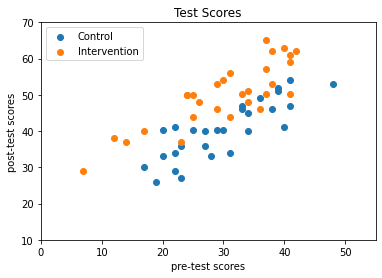

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(control_group[:, 2], control_group[:, 3], label="Control")
ax1.scatter(intervention_group[:, 2], intervention_group[:, 3], label="Intervention")
plt.legend(loc='upper left')
ax1.set_xlabel('pre-test scores')
ax1.set_ylabel('post-test scores')
ax1.set_title('Test Scores')
ax1.set_xlim([0, 55])
ax1.set_ylim([10, 70])
plt.show()

**ANSWER:**

Yes, pre- and post-test scores do seem to correlate highly. We can easily see (and potentially draw!) a linear function describing the correlation between them.

This makes intuitive sense, as somebody who scored higher in the pre-test is more likely to repeat a higher score in the post-test.

### Task 01.08

Display a bar plot with four bars (with error bars): pre-test mean (with standard error) for control and intervention group; and post-test mean (with standard error) for control and intervention group. Label the axes. Interpret this plot: Where are significant differences, do you think? What is your explanation for these differences?

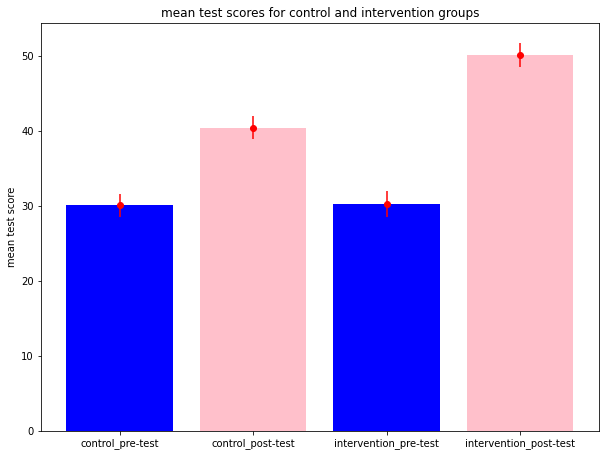

[1.546015652926247, 1.4959527999042772, 1.7287622713945119, 1.6229017700901927]


In [30]:
# sem calculates standard error of the mean
control_pre_error = scipy.stats.sem(control_group[:,2])
control_post_error = scipy.stats.sem(control_group[:,3])
intervention_pre_error = scipy.stats.sem(intervention_group[:,2])
intervention_post_error = scipy.stats.sem(intervention_group[:,3])

errors = [control_pre_error, control_post_error, intervention_pre_error, intervention_post_error]
means = [control_pre_mean, control_post_mean, intervention_pre_mean, intervention_post_mean]
lables = ["control_pre-test", "control_post-test", "intervention_pre-test", "intervention_post-test"]
# blue for pre-tests, pink for post-tests
colors = ["blue", "pink", "blue", "pink"]


fig = plt.figure(figsize=(10,7.5))
ax1 = fig.add_subplot(111)
ax1.bar(lables, means, color=colors)
ax1.set_ylabel('mean test score')
ax1.set_title('mean test scores for control and intervention groups')
ax1.errorbar(lables, means, errors, fmt='o', color="red")
plt.show()

print(errors)



**ANSWER:**
The means of both pre-tests seem to be almost identical. Considering that at that point both groups should have a similar level of knowledge, this is not surprising.<br>
The mean for the post-test scores in the control group is clearly higher than those of the pretests. This does make sense, since the students probably already learned something by taking the pre-test and on top of that they may have been studying on their own inbetween both tests.<br>
The mean for the post-test scores in the intervention group is even higher, suggesting that the intervention may have had a significant positive effect. In any case it shows that students in that group learned more between the tests, than those in the control group, that didn't come into contact with the intervention.<br>
The std-errors of the means do not seem to differ enough to give them meaning.

### Task 01.09

Display a bar plot with two bars (with error bars): the average difference between post- and pre-test score for the control group (with standard error) and for the intervention group (with standard error). Label the axes. Interpret this plot: Do you think the difference of post- and pre-test scores significantly differs between control and intervention group?

**ANSWER:** 

## Statistical Testing

### Task 01.10

Write a python function to compute the Pearson correlation between two arrays of the same size.

In [2]:
def pearsonr(x, y):
    # TODO IMPLEMENT THIS FUNCTION
    return None 

### Task 01.11

Use your function to compute the Pearson correlation between pre-test and post-test scores for both control and intervention condition and print the scores.

Interpret the strength of the correlation using the following rule of thumb from [Mukaka (2012)](https://www.ajol.info/index.php/mmj/article/download/81576/71739):

* A correlation of $0.3 < |r| \leq 0.5$ is considered small.
* A correlation of $0.5 < |r| \leq 0.7$ is considered moderate.
* A correlation of $0.7 < |r| \leq 0.9$ is considered high.
* A correlation of $0.9 < |r| \leq 1.0$ is considered very high.

Validate your scores by computing the Pearson correlation again with `scipy.stats.pearsonr`. Print both `r` and the `p` value returned by the function for both the control and the intervention condition. Are the correlations statistically significant at $0.01$ level?

### Task 01.12

Write a python function that performs a Welch $t$-test. In particular, your function should:
1. compute the number of data points, the mean, and the standard deviation of both samples (use the `ddof = 1` parameter for the `np.std` function).
2. compute the pooled standard deviation as
\begin{equation}
\sigma_\text{pooled} = \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}
\end{equation}
  where $n_x$ and $n_y$ are the number of data points in the two samples and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.
3. compute the $t$-statistic as 
\begin{equation}
t = -\Big|\frac{\mu_x - \mu_y}{\sigma_\text{pooled}}\Big|
\end{equation}
  where $\mu_x$ and $\mu_y$ are the means of the two samples.
4. compute the number of degree of freedom via the Welch-Satterthwaite equation, meaning:
\begin{equation}
\text{df} = \frac{\sigma_\text{pooled}^4}{\frac{\sigma_x^4}{n_x^2\cdot(n_x - 1)} + \frac{\sigma_y^4}{n_y^2\cdot(n_y - 1)}}
\end{equation}
5. compute $p$ as twice the probability of any $t$ value equal or smaller to your value using the `cdf` function of `scipy.stats.t` with the number of freedoms as computed in the previous step.

Your function should return both $t$ and $p$.

In [3]:
def t_test(x, y):
    # number of data points
    nx = len(x)
    ny = len(y)
    # means
    mx = np.mean(x)
    my = np.mean(y)
    # standard deviations
    sx = np.std(x, ddof = 1)
    sy = np.std(y, ddof = 1)

    # pooled standard deviation
    sp = None # TODO IMPLEMENT THIS

    # degrees of freedom
    df = None # TODO IMPLEMENT THIS
    
    # t-statistic
    t = None # TODO IMPLEMENT THIS

    # cumulative probability
    p  = 2*scipy.stats.t.cdf(t, df = df)
    
    return t, p

### Task 01.13

Write python code to perform the following Welch tests (using your function):
1. the pre-test scores in the control versus the intervention condition
2. the post-test scores in the control versus the intervention condition
3. the differences between post- and pre-test scores in the control versus the intervention condition

For each of the tests, print the $t$ and $p$.

Which of the test results are significant at a $0.01$-level?

**Hint:** You can validate that your function returns the correct $t$ and $p$ values by comparing to the output of the function `scipy.stats.ttest_ind` with `equal_var = False`.

### Task 01.14

Compute the effect sizes for the difference in post-test minus pre-test score between control and intervention condition using the formula

\begin{equation}
d = \frac{|\mu_x - \mu_y|}{\sqrt{\frac{1}{2}(\sigma_x^2 + \sigma_y^2)}}
\end{equation}

where $\mu_x$ and $\mu_y$ are the mean score difference in intervention and control condition and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.

Print the effect size and interpret the size of the effect using the following rule of thumb (by [Sawilowsky (2009)](https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?article=1536&context=jmasm))
* An effect of size $0.01 < d \leq 0.2$ is considered very small.
* An effect of size $0.2 < d \leq 0.5$ is considered small.
* An effect of size $0.5 < d \leq 0.8$ is considered moderate.
* An effect of size $0.8 < d \leq 1.2$ is considered large.
* An effect of size $1.2 < d \leq 2.0$ is considered very large.
* An effect of size $d > 2.0$ is considered huge.